# **<span style="color: orange">Business picture in a multinational corporation between 2017 and 2020</span>**

In this project, we're going to analyze a dataset about the business situation in the multinational corporation.

The goal of our analysis is to determine a few indicators of business in corporation. These indicators can be unit price, order quantity, discount, shipping cost, etc.

## <span style="color: green">Sales analysis Dataset</span>

Derrick Kuria, who is Application Developer at Dimension Data in Kenya, made the dataset available that we'll be working with, and you can download it from the [Kaggle](https://www.kaggle.com/datasets/derrickkuria/furniture-sales-and-customer).

---

## *<span style="color: orange">Tình hình kinh doanh của một tập đoàn đa quốc gia từ năm 2017 đến 2020*/<span>

*Trong dự án này, chúng tôi sẽ phân tích một tệp dữ liệu về tình hình kinh doanh trong một tập đoàn đa quốc gia.*

*Mục tiêu của phân tích của chúng tôi là xác định một số chỉ số kinh doanh trong tập đoàn. Các chỉ số này có thể là đơn giá, số lượng đặt hàng, chiết khấu, chi phí vận chuyển, v.v.**

### <span style="color: green">Bộ dữ liệu phân tích bán hàng</span>

*Derrick Kuria, nhà phát triển ứng dụng Dimension Data ở Kenya, đã cung cấp tệp dữ liệu mà chúng tôi sẽ làm việc cùng và bạn có thể tải xuống từ [Kaggle](https://www.kaggle.com/datasets/derrickkuria/furniture-sales-and-customer).* 


In [103]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#add and view data in the sheets
office_sales = pd.ExcelFile('Office Sales.xlsx')
sales = pd.read_excel(office_sales, 'Sales')
customers = pd.read_excel(office_sales, 'Customer')

In [105]:
sales.head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CustomerKey,ProductKey,CategoryName,SubcategoryName,ProductName,UnitPrice,OrderQuantity,Discount %,ShippingCost,OrderPriority
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,56,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,5,0.5,11.92,Medium
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,66,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,4,0.6,9.81,High
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000666,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,2,0.2,8.30,Low
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,2,0.0,9.63,Low
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,63,FUR-BO-10000728,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,7,0.6,12.56,Medium


In [106]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesOrderNumber  29999 non-null  object        
 1   OrderDate         29999 non-null  datetime64[ns]
 2   DeliveryDate      29829 non-null  datetime64[ns]
 3   ShipMode          29999 non-null  object        
 4   CustomerKey       29999 non-null  int64         
 5   ProductKey        29999 non-null  object        
 6   CategoryName      29999 non-null  object        
 7   SubcategoryName   29999 non-null  object        
 8   ProductName       29999 non-null  object        
 9   UnitPrice         29999 non-null  float64       
 10  OrderQuantity     29999 non-null  int64         
 11  Discount %        29999 non-null  float64       
 12  ShippingCost      29999 non-null  float64       
 13  OrderPriority     29999 non-null  object        
dtypes: datetime64[ns](2), 

In [107]:
sales.isnull().sum()

SalesOrderNumber      0
OrderDate             0
DeliveryDate        170
ShipMode              0
CustomerKey           0
ProductKey            0
CategoryName          0
SubcategoryName       0
ProductName           0
UnitPrice             0
OrderQuantity         0
Discount %            0
ShippingCost          0
OrderPriority         0
dtype: int64

In [108]:
customers.head()

,CustomerKey,Customer,StateName,Country,Region,Market,BusinessType
0,56,Joseph Holt,New South Wales,Australia,Oceania,APAC,Consumer
1,57,Eugene Moren,Stockholm,Sweden,North,EU,Home Office
2,58,Annie Thurman,Budapest,Hungary,EMEA,EMEA,Consumer
3,59,Toby Braunhardt,Constantine,Algeria,Africa,Africa,Consumer
4,60,Nat Gilpin,Razavi Khorasan,Iran,EMEA,EMEA,Corporate


In [109]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18804 entries, 0 to 18803
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerKey   18804 non-null  int64 
 1   Customer      18804 non-null  object
 2   StateName     18804 non-null  object
 3   Country       18804 non-null  object
 4   Region        18804 non-null  object
 5   Market        18804 non-null  object
 6   BusinessType  18804 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


#### <span style="color: green">The dataset has 2 sheets named Sales and Customer.</span> 

The Sales worksheet has 29,999 rows and 14 columns, and there are 170 null values in the DeliveryDate column. We have data containing sales of Furniture and Office Supplies from 01/01/2017 to 12/31/2020 based on OrderDate. The data contains the Order date, the products and their respective Unit price, shipping cost, and discounts.

The Customer worksheet includes customer information matching each sold item with 18,804 rows and 7 columns.

---

##### *<span style="color: green"> Bộ dữ liệu có 2 sheet tên là Sales và Customer.</span>*

*Trong sheet 'Sales' có 29.999 hàng và 14 cột, và có 170 giá trị rỗng trong cột DeliveryDate. Dữ liệu chứa doanh số bán Đồ nội thất và Đồ dùng văn phòng từ ngày 01/01/2017 đến 31/12/2020 dựa trên Ngày đặt hàng. Dữ liệu cũng chứa ngày đặt hàng, sản phẩm và đơn giá, chi phí vận chuyển và chiết khấu tương ứng của chúng.*

*Trong sheet 'Customer' bao gồm thông tin khách hàng khớp với từng mặt hàng đã bán, với 18.804 hàng và 7 cột.*

## <span style="color: green">Analyzing Sales status</span> 

We're going to start our analysis by examining the distribution of the data.


### <span style="color: green">Phân tích tình hình kinh doanh</span> 

*Chúng tôi sẽ bắt đầu việc phân tích của mình bằng cách kiểm tra sự phân phối dữ liệu.*


In [110]:
# create new columns to analysis 
sales['Sales']=sales['UnitPrice'] * sales['OrderQuantity'] * (100-sales['Discount %'])/100
sales['OrderMonth']=sales.OrderDate.dt.month
sales['OrderQuarter']=sales.OrderDate.dt.quarter
sales['OrderYear']=sales.OrderDate.dt.year.astype(str)
sales['CatSub'] = sales['CategoryName'] + ', ' + sales['SubcategoryName']
#merge two sheets by left join on Customer
data_mix = pd.merge(sales, customers, how='left', on='CustomerKey')

In [111]:
data_mix.head()

,SalesOrderNumber,OrderDate,DeliveryDate,ShipMode,CustomerKey,ProductKey,CategoryName,SubcategoryName,ProductName,UnitPrice,...,OrderMonth,OrderQuarter,OrderYear,CatSub,Customer,StateName,Country,Region,Market,BusinessType
0,IN-2017-47883,2017-01-01,2017-01-08,Standard Class,56,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26,...,1,1,2017,"Furniture, Furnishings",Joseph Holt,New South Wales,Australia,Oceania,APAC,Consumer
1,IZ-2017-4680,2017-01-03,2017-01-07,Standard Class,66,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",166.71,...,1,1,2017,"Furniture, Chairs",Lindsay Williams,Ninawa,Iraq,EMEA,EMEA,Corporate
2,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000666,Furniture,Chairs,"SAFCO Chairmat, Black",57.39,...,1,1,2017,"Furniture, Chairs",Ken Lonsdale,Auckland,New Zealand,Oceania,APAC,Consumer
3,ID-2017-80230,2017-01-03,2017-01-09,Standard Class,64,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",132.87,...,1,1,2017,"Furniture, Chairs",Ken Lonsdale,Auckland,New Zealand,Oceania,APAC,Consumer
4,ES-2017-4869686,2017-01-03,2017-01-07,Standard Class,63,FUR-BO-10000728,Furniture,Bookcases,"Dania Corner Shelving, Traditional",122.07,...,1,1,2017,"Furniture, Bookcases",Dorothy Dickinson,England,United Kingdom,North,EU,Consumer


## <span style="color: green">Firstly, we analyze the Order and Sales from 2017 to 2020</span> 
### *<span style="color: green">Đầu tiên, chúng tôi phân tích Đơn hàng và Doanh số từ năm 2017 đến năm 2020</span>*

### <span style="color: green">Sales - Orders performance in the years between 2017 to 2020</span> 
#### *<span style="color: green">Hoạt động bán hàng và đơn đặt hàng qua từng năm từ 2017 đến 2020</span>* 

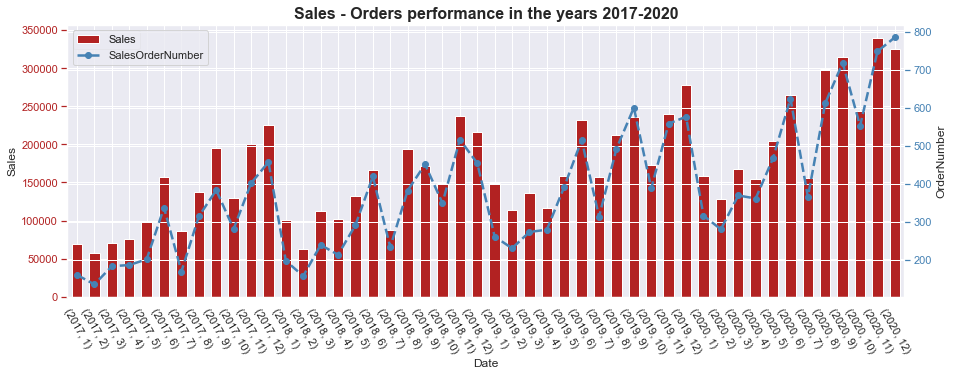

In [112]:
#create figure objects and axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

#create the results between Total Order Number and Sales by Months of Years
df=data_mix.groupby(["OrderYear","OrderMonth"]).agg({'SalesOrderNumber': 'nunique', 'Sales': sum})[['SalesOrderNumber','Sales']] 

#create basic bar plot
df['Sales'].plot(kind='bar', color='#B22222', ax=ax, width=0.6, legend=True)

#add line to plot
df['SalesOrderNumber'].plot(kind='line', color='#4682B4', ax=ax2, linewidth=2.5, marker="o", ls='--', legend=True)

#specify axis colors
ax.tick_params(axis='y', colors='#B22222')
ax2.tick_params(axis='y', colors='#4682B4')

#get the labels of the axis in the legend
ax_bar, label = ax.get_legend_handles_labels()
ax2_line, label2 = ax2.get_legend_handles_labels()
ax2.legend(ax_bar + ax2_line, label + label2, loc=0)

#specify the axis property
ax.set_ylabel('Sales')
ax2.set_ylabel('OrderNumber')
ax.set_xlabel("Date")
ax.tick_params(axis='x', rotation = 300)
plt.title("Sales - Orders performance in the years 2017-2020",size=16, weight='bold')

plt.show()

In [113]:
#create DataFrame by Number of Order and Order Date
orderdateO=data_mix.pivot_table(values='SalesOrderNumber', index='OrderYear',columns='OrderQuarter', aggfunc='nunique')
orderdateO[5] = orderdateO.sum(axis=1)
#change data to percentage
for i in range(1,5):
    orderdateO[i] = round(orderdateO[i]/orderdateO[5]*100,2)

#create 100% stack bar plot Total Order Number by Quarters of Years
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(y=orderdateO[4],x=orderdateO.index,name="Quarter 4",marker=dict(color='blue', line=dict(color='blue', width=0.05))))
fig.add_trace(go.Bar(y=orderdateO[3],x=orderdateO.index,name="Quarter 3",marker=dict(color='yellowgreen', line=dict(color='yellowgreen', width=0.05))))
fig.add_trace(go.Bar(y=orderdateO[2],x=orderdateO.index,name="Quarter 2",marker=dict(color='violet', line=dict(color='violet', width=0.05))))
fig.add_trace(go.Bar(y=orderdateO[1],x=orderdateO.index,name="Quarter 1",marker=dict(color='turquoise', line=dict(color='turquoise', width=0.05))))
fig.update_layout(xaxis=dict(title_text="Year",titlefont=dict(size=10)),
    yaxis=dict(title_text="Number of Order %",ticktext=["0%", "20%", "40%", "60%","80%","100%"],tickvals=[0, 20, 40, 60, 80, 100],tickmode="array",titlefont=dict(size=10)),
    barmode='stack',width=920,height=400,paper_bgcolor='white',plot_bgcolor='white',title_font_size=16,
    title={'text': "% Number of Orders by Quarters in Years",'x':0.5,'y':0.9,'xanchor': 'center','yanchor': 'top'})



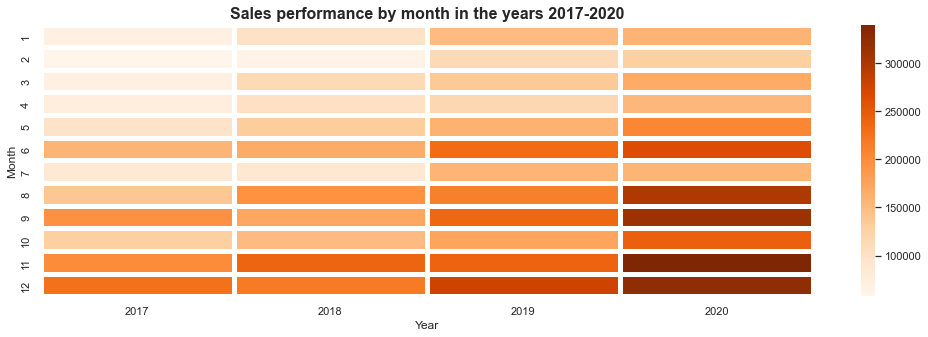

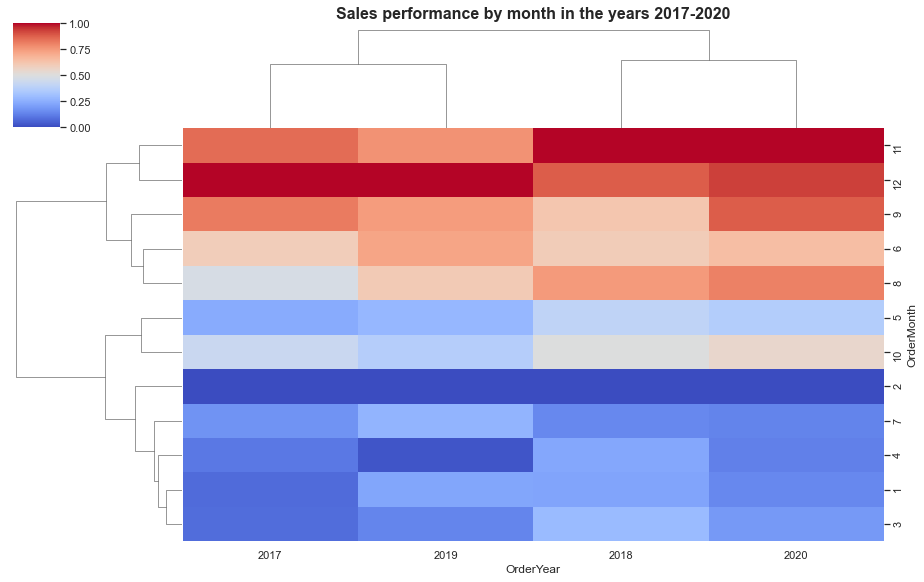

In [114]:
#create the pivot table to view Sales results by Month of Year
pvsales = data_mix.pivot_table(values='Sales',index='OrderMonth',columns='OrderYear', aggfunc='sum')

### co the se bo luon heatmap nay
#create basic heatmap
fig, ax = plt.subplots(figsize=(17.3,5))
sns.heatmap(pvsales,cmap='Oranges',linecolor='white',linewidths=5)
#specify the axis content
ax.set_ylabel('Month')
ax.set_xlabel("Year")
plt.title("Sales performance by month in the years 2017-2020",size=16, weight='bold')


#create basic clustermap
c=sns.clustermap(pvsales,cmap='coolwarm',standard_scale=1,figsize=(13,8))
#specify the axis content
c.ax_col_dendrogram.set_title("Sales performance by month in the years 2017-2020",size=16, weight='bold')

plt.show()

#### **<span style="color: blue">Comment:</span>**

Sales and orders performances over the period of 4 years since 2017:

- Sales and number of orders were positive correlation.    

- Sales had steadily increased over the years. In addition, we can see that the quarterly composition of sales in each year had almost unchanged over the period.

- Q4s were always the best quarter of the years, especially in month Nov and Dec.

- However, Febs in each year were the least and Seps were always better than Octs.


#### *<span style="color: blue">Nhận xét:</span>*

*Hoạt động bán hàng và đơn đặt hàng trong 4 năm kể từ năm 2017:*

- *Doanh số và số lượng đơn đặt hàng có mối tương quan thuận.*

- *Doanh số bán hàng tăng đều qua các năm. Ngoài ra, chúng ta có thể thấy rằng cấu phần doanh thu theo quý trong mỗi năm hầu như không thay đổi so với cùng kỳ.*

- *Quý 4 luôn là quý tốt nhất trong các năm, đặc biệt là vào tháng 11 và tháng 12 mỗi năm.*

- *Tuy nhiên, tháng 2 trong mỗi năm doanh số luôn thấp nhất và doanh số tháng 9 luôn tốt hơn tháng 10.*


## <span style="color: green">Secondly, we carry out the business performance analysis</span>
### *<span style="color: green">Tiếp theo, chúng tôi thực hiện phân tích hoạt động kinh doanh </span>*

### <span style="color: green">The efficiency of each product in 2017-2020</span> 
#### *<span style="color: green">Hiệu quả của từng sản phẩm trong giai đoạn 2017-2020*</span>

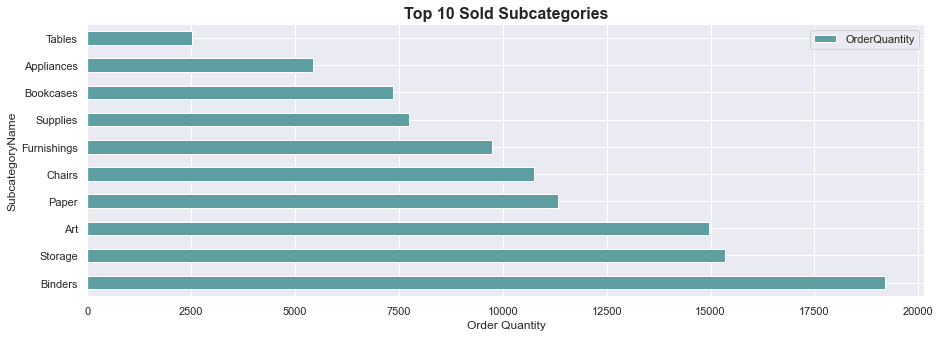

In [115]:
#create DataFrame between Product Name and Order Quantity
product = data_mix.groupby(['SubcategoryName']).agg({'OrderQuantity': sum}).sort_values(by='OrderQuantity', ascending=False)

#create a bar plot with the first 5 index and specify the axis content
product[:10].plot(kind='barh',xlabel='Order Quantity',figsize=(15,5), color=['#5F9EA0'])
plt.title('Top 10 Sold Subcategories',size=16, weight='bold')
plt.show()

                 Sales  ShippingCost
Sales         1.000000      0.943732
ShippingCost  0.943732      1.000000


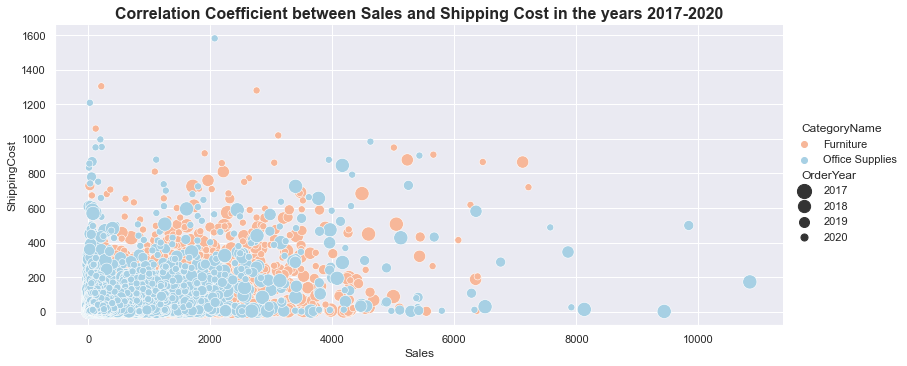

In [116]:

#find the correlation coefficient between two variables
ss=data_mix.pivot_table(values=['Sales','ShippingCost'], index='OrderYear',aggfunc='sum')
print(ss.corr())

'''
#create scatter graph
plt.scatter(data_mix['Sales'], data_mix['ShippingCost'])
plt.show()
'''

#create specific scatter graph
sns.set_theme()
sns.relplot(data = data_mix,x='Sales',y='ShippingCost',hue='CategoryName',
           size='OrderYear',palette='RdBu',sizes=(50,200), height=5, aspect=11.2/5)
plt.title("Correlation Coefficient between Sales and Shipping Cost in the years 2017-2020",size=16, weight='bold')
plt.show()


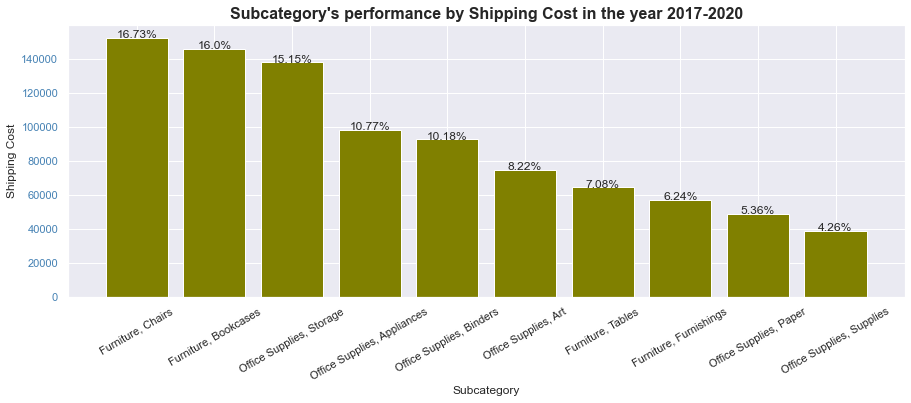

In [117]:
#create figure objects and axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

#create DataFrame between Order and Sales by the products segments
SubcatQty = round(sales.groupby(['CatSub']).agg({'ShippingCost': sum, 'Sales': sum})[['ShippingCost', 'Sales']],2)

#sort DataFrame by count descending
SubcatQty = SubcatQty.sort_values('ShippingCost', ascending=False)
SubcatQty['percShip'] = round(SubcatQty['ShippingCost']/SubcatQty['ShippingCost'].sum()*100, 2)
#create basic bar plot
bar=ax.bar(SubcatQty.index, SubcatQty['ShippingCost'], color='#808000', label = 'Shipping Cost')
ax.tick_params(axis='x', rotation = 30)
#get the content of the bar
for i, p in enumerate(bar):
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    plt.text(x=x+width/2,y=height,s=str(SubcatQty['percShip'][SubcatQty.index[i]])+'%', ha='center')


#specify axis colors
ax.tick_params(axis='y', colors='#4682B4')


#specify the axis content
ax.set_ylabel('Shipping Cost')
ax.set_xlabel("Subcategory")
plt.title("Subcategory\'s performance by Shipping Cost in the year 2017-2020",size=16, weight='bold')

plt.show()

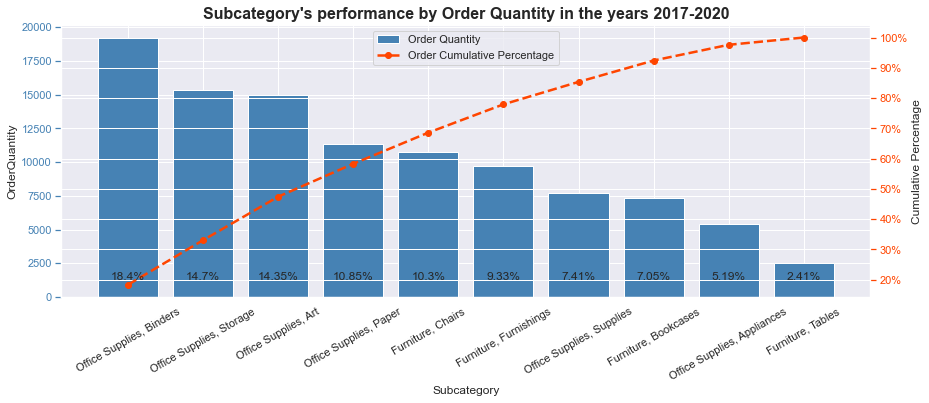

In [118]:
#import member of the module name
from matplotlib.ticker import PercentFormatter

#create figure objects and axis
fig = plt.figure(figsize=(14.5,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

#create a new column 
sales['CatSub'] = sales['CategoryName'] + ', ' + sales['SubcategoryName']
#create DataFrame between Order and Sales by the products segments
SubcatQty = sales.groupby(['CatSub']).agg({'OrderQuantity': sum, 'Sales': sum})[['OrderQuantity', 'Sales']]

#sort DataFrame by count descending
SubcatQty = SubcatQty.sort_values('OrderQuantity', ascending=False)
#add column to display cumulative percentage
SubcatQty['cumpercOrder'] = round(SubcatQty['OrderQuantity'].cumsum()/SubcatQty['OrderQuantity'].sum()*100,2)
SubcatQty['percOrder'] = round(SubcatQty['OrderQuantity']/SubcatQty['OrderQuantity'].sum()*100,2)

#create basic bar plot
bar=ax.bar(SubcatQty.index, SubcatQty['OrderQuantity'], color='#4682B4', label = 'Order Quantity')
ax.tick_params(axis='x', rotation = 30)
#get the content of the bar
for i, p in enumerate(bar):
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    plt.text(x=x+width/2,y=20,s=str(SubcatQty['percOrder'][SubcatQty.index[i]])+'%', ha='center')

#add cumulative percentage line to plot
line=ax2.plot(SubcatQty.index, SubcatQty['cumpercOrder'], color='#FF4500', linewidth=2.5, marker="o", ls='--',label = 'Order Cumulative Percentage')
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors='#4682B4')
ax2.tick_params(axis='y', colors='#FF4500')

#get the labels of the axis in the legend
ax_bar, label = ax.get_legend_handles_labels()
ax2_line, label2 = ax2.get_legend_handles_labels()
ax2.legend(ax_bar + ax2_line, label + label2, loc= 'upper center')

#specify the axis content
ax.set_ylabel('OrderQuantity')
ax2.set_ylabel('Cumulative Percentage')
ax.set_xlabel("Subcategory")
plt.title("Subcategory\'s performance by Order Quantity in the years 2017-2020",size=16, weight='bold')

plt.show()

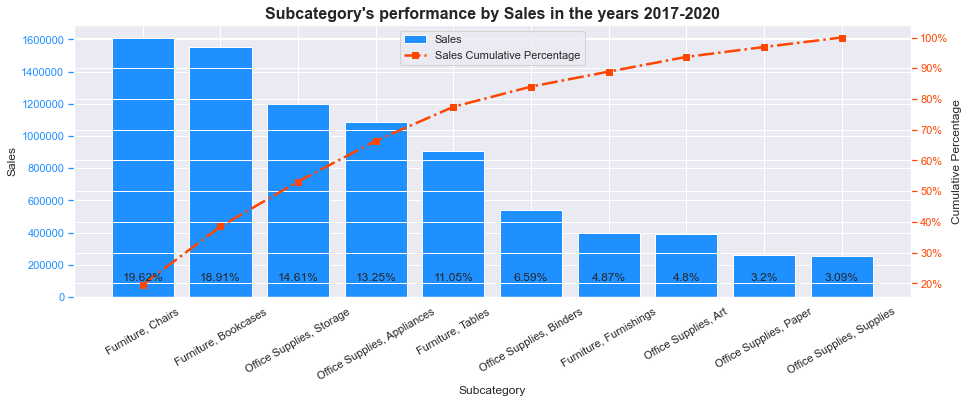

In [119]:
#create figure objects and axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.ticklabel_format(style='plain')
ax2 = ax.twinx()

#create a new column 
sales['CatSub'] = sales['CategoryName'] + ', ' + sales['SubcategoryName']
#create DataFrame between Order and Sales by the products segments
SubcatQty = sales.groupby(['CatSub']).agg({'OrderQuantity': sum, 'Sales': sum})[['OrderQuantity', 'Sales']]
#sort DataFrame by count descending
SubcatQty = SubcatQty.sort_values('Sales', ascending=False)

#add column to display cumulative percentage
SubcatQty['cumpercSales'] = round(SubcatQty['Sales'].cumsum()/SubcatQty['Sales'].sum()*100,2)
SubcatQty['percSales'] = round(SubcatQty['Sales']/SubcatQty['Sales'].sum()*100,2)

#create basic bar plot
bar=ax.bar(SubcatQty.index, SubcatQty['Sales'], color='#1E90FF', label = 'Sales')
ax.tick_params(axis='x', rotation = 30)

#get the content of the bar
for i, p in enumerate(bar):
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    plt.text(x=x+width/2,y=21,s=str(SubcatQty['percSales'][SubcatQty.index[i]])+'%', ha='center')

#add cumulative percentage line to plot
ax2.plot(SubcatQty.index, SubcatQty['cumpercSales'], color='#FF4500', linewidth=2.5, marker="s", ls='-.',label = 'Sales Cumulative Percentage')
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors='#1E90FF')
ax2.tick_params(axis='y', colors='#FF4500')

#get the labels of the axis in the legend
ax_bar, label = ax.get_legend_handles_labels()
ax2_line, label2 = ax2.get_legend_handles_labels()
ax2.legend(ax_bar + ax2_line, label + label2, loc= 'upper center')

#specify the axis content
ax.set_ylabel('Sales')
ax2.set_ylabel('Cumulative Percentage')
ax.set_xlabel("Subcategory")
plt.title("Subcategory\'s performance by Sales in the years 2017-2020",size=16, weight='bold')

plt.show()

### <span style="color: blue">Comment:</span>

- There was a positive correlation between sales and shipping costs.

- There were the highest shipping costs at over 15% in  Chairs, Bookcases of Furniture and Storage of Office Supplies respectively.

- The Office Supplies category had the highest rate of order quantity, at about 71%, while the Furniture segment took more than 54% of sales in the category of business.

- Furthermore, Chairs and Bookcases of Furniture subcategory accounted for about more than 38% of Sales, while 33% of Order Quantity of Office Supplies subcategory were Binders, Storage and Art. 


### *<span style="color: blue">Nhận xét:</span>*

- *Có mối tương quan thuận giữa doanh thu và chi phí vận chuyển.*

- *Chairs, Bookcases thuộc danh mục Furniture và Storage thuộc danh mục Office Supplies có chi phí vận chuyển cao nhất, đều trên 15% tổng chi phí.*

- *Hạng mục Office Supplies có tỷ lệ số lượng đặt hàng cao nhất khoảng 71%, trong khi mảng Furniture chiếm hơn 54% doanh số trong nhóm hàng kinh doanh.*

- *Ngoài ra, Chairs và Bookcases của danh mục Furniture chiếm khoảng hơn 38% doanh số bán hàng, trong khi 33% Số lượng đặt hàng là của danh mục phụ Office Supplies gồm Binders, Storage and Art.*

## <span style="color: green">Next, we explore the business activities of each region</span>

### *<span style="color: green">Tiếp sau đó, chúng tôi tìm hiểu các hoạt động kinh doanh của từng khu vực </span>*

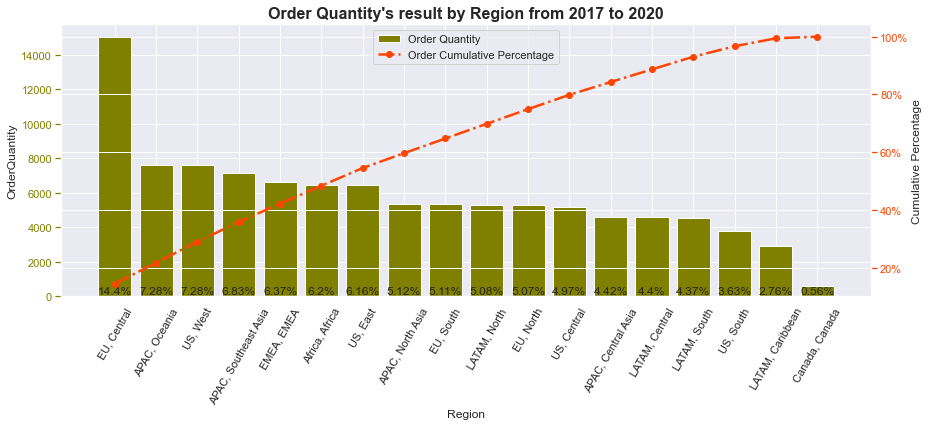

In [120]:
#create figure objects and axis
fig = plt.figure(figsize=(14.5,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

#create a new column 
data_mix['MarReg']= data_mix['Market'] + ', ' + data_mix['Region']
#create DataFrame between Order and Sales by Market/Region
market = data_mix.groupby(['MarReg']).agg({'OrderQuantity': sum, 'Sales': sum})[['OrderQuantity', 'Sales']]

#sort DataFrame by count descending
market = market.sort_values('OrderQuantity', ascending=False)
#add column to display cumulative percentage
market['cumpercOrder'] = round(market['OrderQuantity'].cumsum()/market['OrderQuantity'].sum()*100,2)
market['percOrder'] = round(market['OrderQuantity']/market['OrderQuantity'].sum()*100,2)

#create basic bar plot
bar=ax.bar(market.index, market['OrderQuantity'], color='#808000', label = 'Order Quantity')
ax.tick_params(axis='x', rotation = 60)

#get the content of the bar
for i, p in enumerate(bar):
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    plt.text(x=x+width/2,y=11,s=str(market['percOrder'][market.index[i]])+'%', ha='center')

#add cumulative percentage line to plot
ax2.plot(market.index, market['cumpercOrder'], color='#FF4500', linewidth=2.5, marker="o", ls='-.',label = 'Order Cumulative Percentage')
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors='#808000')
ax2.tick_params(axis='y', colors='#FF4500')

#get the labels of the axis in the legend
ax_bar, label = ax.get_legend_handles_labels()
ax2_line, label2 = ax2.get_legend_handles_labels()
ax2.legend(ax_bar + ax2_line, label + label2, loc= 'upper center')

#specify the axis content
ax.set_ylabel('OrderQuantity')
ax2.set_ylabel('Cumulative Percentage')
ax.set_xlabel('Region')
plt.title('Order Quantity\'s result by Region from 2017 to 2020',size=16, weight='bold')

plt.show()

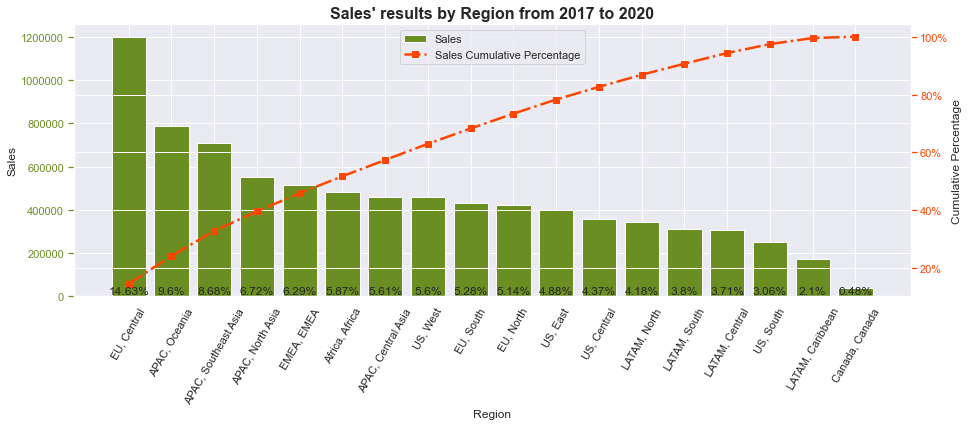

In [121]:
#create figure objects and axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.ticklabel_format(style='plain')
ax2 = ax.twinx()

#sort DataFrame by count descending
market = market.sort_values('Sales', ascending=False)

#add column to display cumulative percentage
market['cumpercSales'] = round(market['Sales'].cumsum()/market['Sales'].sum()*100,2)
market['percSales'] = round(market['Sales']/market['Sales'].sum()*100,2)

#create basic bar plot
bar=ax.bar(market.index, market['Sales'], color='#6B8E23', label = 'Sales')
ax.tick_params(axis='x', rotation = 60)
#get the content of the bar
for i, p in enumerate(bar):
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    plt.text(x=x+width/2,y=11,s=str(market['percSales'][market.index[i]])+'%', ha='center')
    
#add cumulative percentage line to plot
ax2.plot(market.index, market['cumpercSales'], color='#FF4500', linewidth=2.5, marker="s", ls='-.',label = 'Sales Cumulative Percentage')
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors='#6B8E23')
ax2.tick_params(axis='y', colors='#FF4500')

#get the labels of the axis in the legend
ax_bar, label = ax.get_legend_handles_labels()
ax2_line, label2 = ax2.get_legend_handles_labels()
ax2.legend(ax_bar + ax2_line, label + label2, loc= 'upper center')

#specify the axis content
ax.set_ylabel('Sales')
ax2.set_ylabel('Cumulative Percentage')
ax.set_xlabel('Region')
plt.title('Sales\' results by Region from 2017 to 2020',size=16, weight='bold')

plt.show()

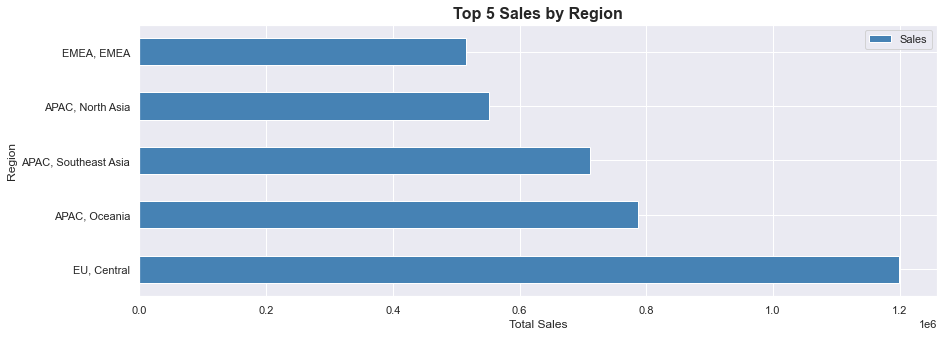

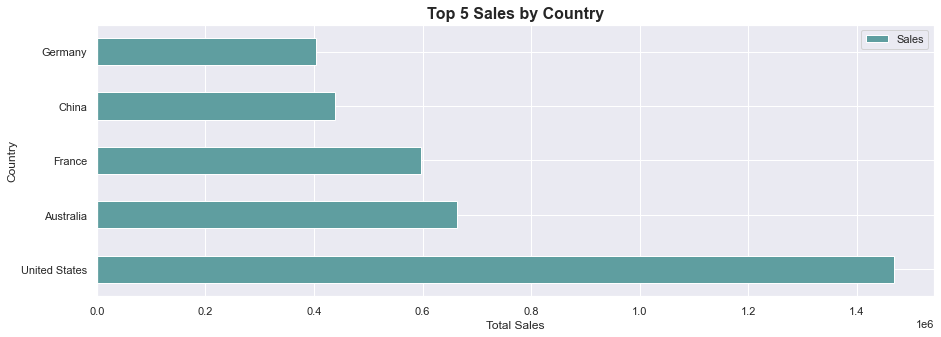

In [122]:
#create DataFrame between Sales with Market/Region
country = data_mix.pivot_table('Sales','MarReg', aggfunc=sum).sort_values('Sales', ascending=False)
#create a bar plot with the first 5 index and specify the axis content
country[:5].plot(kind='barh',xlabel='Total Sales',ylabel='Region',figsize=(14.3,5), color=['#4682B4'])
plt.title('Top 5 Sales by Region',size=16, weight='bold')

#create DataFrame between Sales with Country
country = data_mix.pivot_table('Sales','Country', aggfunc=sum).sort_values('Sales', ascending=False)
#create a bar plot with the first 5 index and specify the axis content
country[:5].plot(kind='barh',xlabel='Total Sales',figsize=(15,5), color=['#5F9EA0'])
plt.title('Top 5 Sales by Country',size=16, weight='bold')

plt.show()

### <span style="color: blue">Comment:</span>
    
- Central EU, Oceania APAC, West US and Southeast Asia APAC were the four best performance regions. They contributed approxiamtely 36% of order quantity and more than 38% of sales. Canada, on the other hand, was the worst region in term of performance. 

- Furthermore, the US took total sales more many times than the countries in the top 5 highest total sales countries in 4 years.


#### *<span style="color: blue">Nhận xét:</span>*
    
- *Central EU, Oceania APAC, West US và Southeast Asia APAC là bốn khu vực có hiệu suất kinh doanh tốt nhất về doanh thu và đơn hàng. Họ đóng góp khoảng 36% số lượng đặt hàng và hơn 38% doanh số bán hàng. Ngược lại, Canada là khu vực kém nhất về hiệu suất.*

- *Hơn nữa, nước Mỹ có doanh số bán hàng cao gấp nhiều lần so với các nước khác nằm trong top 5 quốc gia có tổng doanh thu cao nhất trong 4 năm.*


## <span style="color: green">Finally, we deeply consider the effectiveness of each category in the years 2017 - 2020</span>

### *<span style="color: green">Cuối cùng, chúng tôi xem xét kỹ về hiệu quả của từng ngành hàng qua các năm 2017 - 2020</span>*



### <span style="color: green">Hierarchical structure for Categories by Order Quantity and Sales</span>

#### *<span style="color: green">Cấu trúc phân cấp cho từng ngành hàng theo số lượng đặt hàng và doanh số bán hàng</span>*

In [123]:
#create DataFrame between OrderQuantity and Sales by Category
df = data_mix.groupby(['CategoryName','SubcategoryName']).agg({'OrderQuantity': sum, 'Sales': sum})[['OrderQuantity','Sales']].reset_index()

#create treemap for Category by Order Quantity
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('CategoryName'),'CategoryName','SubcategoryName'], values='OrderQuantity',  
                 color="OrderQuantity", hover_data=['SubcategoryName'],color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),title_font_size=16,
    title={'text': "Hierarchical structure for Categories by Order Quantity",'x':0.5,'y':0.97,'xanchor': 'center','yanchor': 'top'})
fig.show()


#create treemap for Category by Sales
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('CategoryName'),'CategoryName','SubcategoryName'], values='Sales',  
                 color="Sales", hover_data=['SubcategoryName'],color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),title_font_size=16,
    title={'text': "Hierarchical structure for Categories by Sales",'x':0.5,'y':0.97,'xanchor': 'center','yanchor': 'top'})
fig.show()

### <span style="color: blue">Comment:</span>

- In the Office Supplies category, Binders accounted for more than 19000 Order Quantity, Storage and Art reached about 15000 one, while Chairs and Furnishings in Furniture category had approximately 10,000 orders.

- Chairs and Bookcases in the Furniture segment were the highest sales, at about 1.6 million. At the same time, Storage accounted for the highest sales in the Office Supplies category at about 1.2 million.


#### *<span style="color: blue">Nhận xét:</span>*

- *Trong ngành hàng Office Supplies, mặt hàng Binders chiếm hơn 19000 số lượng đặt hàng, mặt hàng Storage và Art đạt khoảng 15000 lần đặt, trong khi Chairs và Furnishings thuộc ngành hàng Furniture có lượng đặt hàng xấp xỉ 10000 lần.*

- *Chairs và Bookcases có doanh số bán hàng cao nhất trong ngành hàng Furniture khoảng 1,6 triệu, đồng thời, Storage chiếm doanh số cao nhất trong ngành hàng Office Supplies khoảng 1,2 triệu*

### <span style="color: green">Hierarchical structure for Order Quantity and Sales by each Market</span>

#### *<span style="color: green">Cấu trúc phân cấp cho số lượng đặt hàng và doanh số bán hàng theo từng thị trường kinh doanh</span>*

In [124]:
#create DataFrame between OrderQuantity and Sales by Category
df = data_mix.groupby(['Market','Region','Country']).agg({'OrderQuantity': sum, 'Sales': sum})[['OrderQuantity','Sales']].reset_index()

#create treemap for Market by Order Quantity
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('Market'),'Market','Region','Country'], values='OrderQuantity',  
                 color="OrderQuantity", hover_data=['Country'],color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),title_font_size=16,
    title={'text': "Hierarchical structure for Order Quantity by Market",'x':0.5,'y':0.97,'xanchor': 'center','yanchor': 'top'})
fig.show()


#create treemap for Market by Sales
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('Market'),'Market','Region','Country'], values='Sales',  
                 color="Sales", hover_data=['Country'],color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),title_font_size=16,
    title={'text': "Hierarchical structure for Sales by Market",'x':0.5,'y':0.97,'xanchor': 'center','yanchor': 'top'})
fig.show()


### <span style="color: blue">Comment:</span>

- France in the Central EU and the United States in the West US have the largest number of orders, over 7300. In contrast, EMEA and Africa markets have the lowest orders at 800 and 650, respectively.

- Australia in Oceania APAC had the highest sales of more than 660000, while France in Central EU had sales near 600000. EMEA and Africa markets, on the other hand, had the lowest sales of 66000 and 50900 respectively.


#### *<span style="color: blue">Nhận xét:</span>*

- *France thuộc Central EU và United States thuộc West US có số lượng đơn hàng lớn nhất, hơn 7300. Ngược lại, EMEA và Africa lại có số lượng đơn hàng thấp nhất lần lượt là 800 và 650*

- *Australia thuộc Oceania APAC có danh số bán hàng cao nhất hơn 660000, trong khi France thuộc Central EU có doanh số bán hàng gần 600000. Ngược lại, EMEA và Africa lại có doanh số bán hàng thấp nhất lần lượt là 66000 và 50900*
